<a href="https://colab.research.google.com/github/frolovtsev/FGI/blob/main/fiber_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
!pip install pymmf
clear_output()

In [ ]:
import numpy as np
import json

class FiberParams:
    def __init__(self, NA=0.20, radius=25., wavelength=1.55, fiber_type='GRIN', n_center=1.45,
                 area_size=2.4*25, n_pixels_x=256):
        self.NA = NA
        self.radius = radius
        self.wavelength = wavelength
        self.fiber_type = fiber_type
        self.n_center = n_center

        self.area_size = area_size
        self.n_pixels_x = n_pixels_x

    def save_params(self, filename, mode='w', openfile=True):
        if openfile:
            with open(filename, mode=mode) as fp:
                json.dump(self.__dict__, fp)
        else:
            json.dump(self.__dict__, filename)


class ModeSolverParams:
    def __init__(self, change_bc_radius_step=0.95, N_beta_coarse=1000,
                 degenerate_mode='exp', min_radius_bc=1.5,
                 r_max=3.2*25, n_points_search=2**8, dh=2*25/(2**8)):
        self.change_bc_radius_step = change_bc_radius_step
        self.N_beta_coarse = 1000
        self.degenerate_mode = degenerate_mode
        self.min_radius_bc = min_radius_bc
        self.r_max = r_max
        self.n_points_search = n_points_search
        self.dh = dh

    def save_params(self, filename, mode='w', openfile=True):
        if openfile:
            with open(filename, mode=mode) as fp:
                json.dump(self.__dict__, fp)
        else:
            json.dump(self.__dict__, filename)

In [ ]:
import pyMMF

class ComplexModeSolver:
    def __init__(self, fiber_params_obj, solver_params_obj):
        self.fiber_params = fiber_params_obj
        self.solver_params = solver_params_obj

        self.profile = pyMMF.IndexProfile(npoints=self.fiber_params.n_pixels_x,
                                          areaSize=self.fiber_params.area_size)
        self.profile.initParabolicGRIN(n1=self.fiber_params.n_center,
                                       a=self.fiber_params.radius,
                                       NA=self.fiber_params.NA)
        self.solver = pyMMF.propagationModeSolver()
        self.solver.setIndexProfile(self.profile)
        self.solver.setWL(self.fiber_params.wavelength)

    def solve(self):
        modes = self.solver.solve(mode='radial',
                                  curvature=None,
                                  r_max=self.solver_params.r_max,
                                  dh=self.solver_params.dh,
                                  min_radius_bc=self.solver_params.min_radius_bc,
                                  change_bc_radius_step=self.solver_params.change_bc_radius_step,
                                  N_beta_coarse=self.solver_params.N_beta_coarse,
                                  degenerate_mode=self.solver_params.degenerate_mode)
        clear_output()
        return modes

In [ ]:
fiber_params = FiberParams()
solver_params = ModeSolverParams()
solver = ComplexModeSolver(fiber_params, solver_params)

modes = solver.solve()

In [ ]:
class ModesIntensityObtainer:
    '''
    returns list with intensity profiles, as well as list with periodicities,
    i.e. periodicity=2 means that rotation 2pi/2 gives the original result.
    for centrosymmetric profiles, periodicity=1
    '''
    def __init__(self, modes, tol=0.001):
        self.modes = modes
        self.tol = tol
        groups_of_neardeg_modes = np.array(self.modes.getNearDegenerate(tol=self.tol))
        l = np.array(self.modes.l)
        m = np.array(self.modes.m)

        self.intensity_profiles = []
        self.periodisities = []

        for group in groups_of_neardeg_modes:
            m_group = m[group]
            l_group = l[group]

            





In [ ]:
matr = modes.getModeMatrix()

In [ ]:
matr[:,0].reshape((256,256))

array([[ 1.23659896e-19+0.j, -1.96001207e-19+0.j, -1.22712734e-19+0.j,
        ..., -1.22712734e-19+0.j, -1.96001207e-19+0.j,
         1.23659896e-19+0.j],
       [-1.96001207e-19+0.j, -9.22962652e-20+0.j,  2.25294951e-18+0.j,
        ...,  2.25294951e-18+0.j, -9.22962652e-20+0.j,
        -1.96001207e-19+0.j],
       [-1.22712734e-19+0.j,  2.25294951e-18+0.j, -1.13352347e-17+0.j,
        ..., -1.13352347e-17+0.j,  2.25294951e-18+0.j,
        -1.22712734e-19+0.j],
       ...,
       [-1.22712734e-19+0.j,  2.25294951e-18+0.j, -1.13352347e-17+0.j,
        ..., -1.13352347e-17+0.j,  2.25294951e-18+0.j,
        -1.22712734e-19+0.j],
       [-1.96001207e-19+0.j, -9.22962652e-20+0.j,  2.25294951e-18+0.j,
        ...,  2.25294951e-18+0.j, -9.22962652e-20+0.j,
        -1.96001207e-19+0.j],
       [ 1.23659896e-19+0.j, -1.96001207e-19+0.j, -1.22712734e-19+0.j,
        ..., -1.22712734e-19+0.j, -1.96001207e-19+0.j,
         1.23659896e-19+0.j]])

In [ ]:
modes.profiles[0].reshape((256,256))

array([[ 1.23659896e-19, -1.96001207e-19, -1.22712734e-19, ...,
        -1.22712734e-19, -1.96001207e-19,  1.23659896e-19],
       [-1.96001207e-19, -9.22962652e-20,  2.25294951e-18, ...,
         2.25294951e-18, -9.22962652e-20, -1.96001207e-19],
       [-1.22712734e-19,  2.25294951e-18, -1.13352347e-17, ...,
        -1.13352347e-17,  2.25294951e-18, -1.22712734e-19],
       ...,
       [-1.22712734e-19,  2.25294951e-18, -1.13352347e-17, ...,
        -1.13352347e-17,  2.25294951e-18, -1.22712734e-19],
       [-1.96001207e-19, -9.22962652e-20,  2.25294951e-18, ...,
         2.25294951e-18, -9.22962652e-20, -1.96001207e-19],
       [ 1.23659896e-19, -1.96001207e-19, -1.22712734e-19, ...,
        -1.22712734e-19, -1.96001207e-19,  1.23659896e-19]])

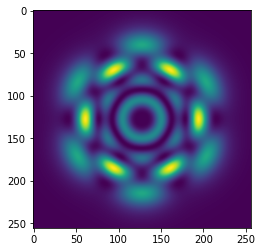

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.abs(modes.profiles[47].reshape((256,256))-np.exp(1j*np.pi)*modes.profiles[54].reshape((256,256)))**2)

In [ ]:
np.array(modes.getNearDegenerate(tol=0.001)[9])

array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54])

In [ ]:
np.array(modes.m)[np.array(modes.getNearDegenerate(tol=0.001)[9])]

array([-1,  1,  3, -3,  5, -5, -7,  7, -9,  9])

In [ ]:
modes.getNearDegenerate(tol=0.001)

[[0],
 [1, 2],
 [3, 4, 5],
 [6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19, 20],
 [21, 22, 23, 24, 25, 26, 27],
 [28, 29, 30, 31, 32, 33, 34, 35],
 [36, 37, 38, 39, 40, 41, 42, 43, 44],
 [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]]

In [ ]:
24/1.5


16.0

In [ ]:
60/2

30.0

In [ ]:
60/24

2.5

In [ ]:
4/3

1.3333333333333333

In [ ]:
60*2.54/200

0.762